# Handling Missing Values

In [89]:
#import required libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# for Box-Cox Transformation

from scipy import stats

# for min_max scaling

from mlxtend.preprocessing import minmax_scaling

# plotting modules

import seaborn as sns
import matplotlib.pyplot as plt

#date parsing

import datetime

In [90]:
#load data

data = pd.read_csv('Building_Permits.csv')

In [91]:
#lets look at the first 10 recods in the data

data.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


let's found out how much data has missing values

In [4]:
total_missing_values = data.isnull().sum()
total_values = np.product(data.shape)
missing_value_counts = total_missing_values.sum()
missing_values_percent = (missing_value_counts/total_values)*100
print(f"Total missing values are {missing_values_percent:.2f} %")

Total missing values are 26.26 %


### Drop Missing Values - rows
Let's drop the rows with the missing values and see what we have left.

In [5]:
missing_values_drop = data.dropna(axis=0)
missing_values_drop.shape

(0, 43)

##### This means that all the rows with missing values are removed

## Drop Missing Vlaues - columns
Let's drop the columns with missing value and see what we have left.

In [10]:
missing_values_drop_cols = data.dropna(axis=1)
print("Total no of columns in original data: ", data.shape[1])
print("Total no of columns dropped: ", missing_values_drop_cols.shape[1])
print("Remaining columns: ",data.shape[1]-missing_values_drop_cols.shape[1])

Total no of columns in original data:  43
Total no of columns dropped:  12
Remaining columns:  31


## Filling Missing Values Automatically
Replace the "NaN" values with the one that comes directly after it. Replace other NaNs' with zeros

In [11]:
missing_values_imputed = data.fillna(method="bfill", axis=0).fillna(0)

In [16]:
#now let's check if there is any missing value
missing_values_imputed.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Number Suffix                      0
Street Name                               0
Street Suffix                             0
Unit                                      0
Unit Suffix                               0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Structural Notification                   0
Number of Existing Stories                0
Number of Proposed Stories                0
Voluntary Soft-Story Retrofit   

# Scaling and Normalization

Diffrence: Scaling and Normalization are used interchangebly, that's why they looks similar. But there is a difference between the two. Scaling means bringing the data into a specific range like between 0 and 1 or -1 and 1 etc. Normalization means changing the shape of the distribution of the data

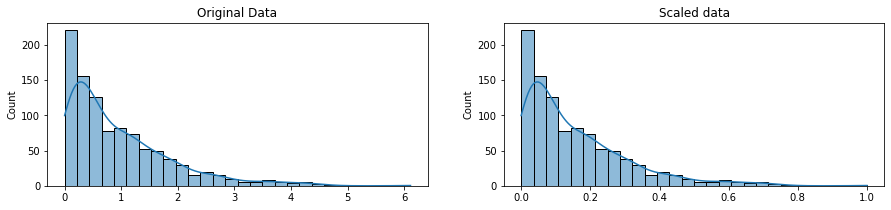

In [5]:
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [6]:
fig.savefig("Normalized.png")

### Normalization

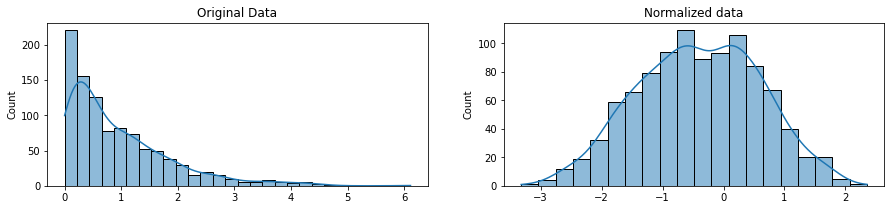

In [7]:
normalized_data = stats.boxcox(original_data)
# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# Parsing Dates

In [8]:
earthquakes = pd.read_csv("database.csv")

In [9]:
earthquakes.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [10]:
print(earthquakes['Date'].dtype)

object


In [12]:
dates_length = earthquakes.Date.str.len()
dates_length

0        10
1        10
2        10
3        10
4        10
         ..
23407    10
23408    10
23409    10
23410    10
23411    10
Name: Date, Length: 23412, dtype: int64

In [13]:
dates_length.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [15]:
indices = np.where([dates_length==24])[1]

In [16]:
earthquakes.loc[indices]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [19]:
earthquakes.Date.loc[3378] = "12/3/1973"
earthquakes.Date.loc[7512] = "12/3/1973"
earthquakes.Date.loc[20650] = "12/3/1973"


In [20]:
earthquakes.iloc[indices]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,...,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973
7512,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,...,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973
20650,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,...,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973,12/3/1973


In [22]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

In [23]:
print(earthquakes['date_parsed'].dtype)

datetime64[ns]


In [24]:
earthquakes.Date

0        01/02/1965
1        01/04/1965
2        01/05/1965
3        01/08/1965
4        01/09/1965
            ...    
23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, Length: 23412, dtype: object

In [75]:
#select the day of the month
day_of_the_month = earthquakes['date_parsed'].dt.day

In [76]:
day_of_the_month = day_of_the_month.dropna()

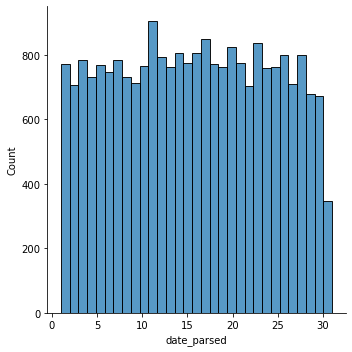

In [78]:
sns.displot(day_of_the_month, kde= False, bins=31);

# Character Encoding
Character encodings are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi").
 There are many different encodings, and if you tried to read in text with a different encoding than the one it was originally written in, you ended up with scrambled tex

In [70]:
import chardet

In [71]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [77]:
# encode it to a different encoding, replacing characters that raise errors

after = before.encode("utf-8", errors="replace")

# check the type

type(after)

bytes

In [76]:
#convert it back to utf-8

print(after.decode("utf-8"))

This is the euro symbol: €


You can think of different encodings as different ways of recording music. You can record the same music on a CD, cassette tape or 8-track. While the music may sound more-or-less the same, you need to use the right equipment to play the music from each recording format. The correct decoder is like a cassette player or a CD player. If you try to play a cassette in a CD player, it just won't work.

In [78]:
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [86]:
before = "This is the  symbol: €"

after = before.encode("ascii", errors='replace')

print(after)

print(after.decode("utf-8"))

b'This is the  symbol: ?'
This is the  symbol: ?


### Reading files with encoding problems
Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes you'll get an error like this: UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

In [87]:
police_kiling= pd.read_csv("PoliceKillingsUS.csv", index_col = 0)
police_kiling.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [88]:
#saving file with utf-8 encoding
police_kiling.to_csv("PoliceKillingsUS.csv", encoding = "utf-8")

# Inconsistent data
Hot to handle incositent text entries in data

In [49]:
import fuzzywuzzy
from fuzzywuzzy import process

In [33]:
professors = pd.read_csv("pakistan_intellectual_capital.csv", index_col=0)

In [34]:
professors.head()

,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


Say we're interested in cleaning up the "Country" column to make sure there's no data entry inconsistencies in it. We could go through and check each row by hand, of course, and hand-correct inconsistencies when we find them. There's a more efficient way to do this, though!

In [43]:
countries = professors.Country.unique()
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

If we look at the countries names, there are two countries with Germany and germany, three USA with "USA", " USA" and "USofA and so one.

First thing we gonna do with the dataset is to convert all the countries names into lower-case and remove whiet spaces at the beginning and at the end of the country name

In [44]:
#convert to lower case

professors['Country'] = professors['Country'].str.lower()

# remove trailing white spaces

professors['Country'] = professors['Country'].str.strip()


In [47]:
professors.Country.unique()

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'southkorea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'south korea', 'macau', 'singapore', 'spain',
       'japan', 'hongkong', 'saudi arabia', 'mauritius', 'scotland'],
      dtype=object)

After looking at the south korea, we had two entries with "south korea" and "southkorea" which is the same. let's deal with this. we will use the fuzzy class from the fuzzywuzzy package.
Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "south korea".

In [51]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('South Korea', 100),
 ('SouthKorea', 48),
 ('Saudi Arabia', 43),
 ('Norway', 35),
 ('Austria', 33),
 ('Ireland', 33),
 ('Pakistan', 32),
 ('Portugal', 32),
 ('Scotland', 32),
 ('Australia', 30)]

In [52]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [53]:
replace_matches_in_column(df=professors, column="Country", string_to_match="south korea")

All done!


In [60]:
countries = professors.Country.unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

Now let's examine the graduated column

In [61]:
professors["Graduated from"]

2                           Asian Institute of Technology
4                           Asian Institute of Technology
5                           Asian Institute of Technology
6                           Asian Institute of Technology
24      Balochistan University of Information Technolo...
                              ...                        
1974                                                  JNU
1975                                             Grenoble
1977                          Florida Atlantic University
1979    Ghulam Ishaq Khan Institute of Science and Tec...
1980                            Seoul National University
Name: Graduated from, Length: 1142, dtype: object

In [65]:
#convert it to lower case

professors["Graduated from"] = professors["Graduated from"].str.lower()

#remove white spaces

professors["Graduated from"] = professors["Graduated from"].str.strip()

#let's see unique vlaues

professors["Graduated from"].unique()

array(['asian institute of technology',
       'balochistan university of information technology, engineering and management sciences',
       'university of balochistan',
       "sardar bahadur khan women's university",
       'srh hochschule heidelberg',
       'institute of business administration,karachi', 'duet,karachi',
       'university of turbat', 'university of vienna',
       'monash university', 'university of stirling',
       'chinese academy of sciences', 'university of innsbruck',
       'vienna university of technology', 'university of paris-est',
       'the university of cambridge', 'harbin institute of technology',
       'university of nice, sophia antipolis', 'the university of york',
       'galilée - université paris 13', 'university of bedfordshire',
       'north dakota state university', 'kyungpook national university',
       'the university of manchester',
       'national university of sciences and technology',
       'fast– national university of computer

There is some inconsistencies like "university of florida" and "univeristy of central florida" both appear in the columns.

In [66]:
replace_matches_in_column(professors, column = "Graduated from", string_to_match="University of Central Florida")

All done!


In [67]:
graduated_from = professors["Graduated from"].unique()
graduated_from.sort()
graduated_from

array(['University of Central Florida', 'abasyn university',
       'abdul wali khan university, mardan',
       'abdus salam school of mathematical sciences,gc university',
       'agricultural university peshawar', 'allama iqbal open university',
       'asian institute of technology', 'aston university, birmingham',
       'australian national university, caneberra',
       'bahauddin zakariya university', 'bahria university',
       'bahria university,islamabad',
       'balochistan university of information technology, engineering and management sciences',
       'barani institute of information technology',
       'beaconhouse national university', 'beihang university',
       'beijing institute of technology',
       'beijing institute of technology beijing',
       'beijing university of posts & telecommunications',
       'biztek institute of business & technology,karachi',
       'blekinge institute of technology', 'boston university',
       'brock university canada', 'brune

at the country there is "usa" and "usofa" which should be the same. Let's deal with this

In [68]:
replace_matches_in_column(professors, column="Country", string_to_match="usa")

All done!


In [69]:
professors["Country"].unique()

array(['thailand', 'pakistan', 'germany', 'usa', 'uk', 'china', 'france',
       'south korea', 'malaysia', 'sweden', 'italy', 'canada', 'norway',
       'ireland', 'new zealand', 'urbana', 'portugal',
       'russian federation', 'finland', 'netherland', 'greece', 'turkey',
       'macau', 'singapore', 'japan', 'hongkong', 'saudi arabia',
       'mauritius', 'scotland'], dtype=object)